In [2]:
import pandas as pd
import os
os.getcwd()

'C:\\Users\\aabas\\Desktop\\Jupyter Notebooks'

In [3]:
movies = pd.read_csv('P4-Movie-Ratings.csv')

In [4]:
movies

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009
...,...,...,...,...,...,...
554,Your Highness,Comedy,26,36,50,2011
555,Youth in Revolt,Comedy,68,52,18,2009
556,Zodiac,Thriller,89,73,65,2007
557,Zombieland,Action,90,87,24,2009


In [5]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [6]:
movies.columns= ['Film', 'Genre', 'CriticRating', 'AudienceRatings',
       'BudgetMillions', 'Year']

In [7]:
movies

,Film,Genre,CriticRating,AudienceRatings,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009
...,...,...,...,...,...,...
554,Your Highness,Comedy,26,36,50,2011
555,Youth in Revolt,Comedy,68,52,18,2009
556,Zodiac,Thriller,89,73,65,2007
557,Zombieland,Action,90,87,24,2009


In [8]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Film             559 non-null    object
 1   Genre            559 non-null    object
 2   CriticRating     559 non-null    int64 
 3   AudienceRatings  559 non-null    int64 
 4   BudgetMillions   559 non-null    int64 
 5   Year             559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [9]:
movies.describe()

,CriticRating,AudienceRatings,BudgetMillions,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [10]:
movies.Film=movies.Film.astype('category')
movies.Genre=movies.Genre.astype('category')
movies.Year=movies.Year.astype('category')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Film             559 non-null    category
 1   Genre            559 non-null    category
 2   CriticRating     559 non-null    int64   
 3   AudienceRatings  559 non-null    int64   
 4   BudgetMillions   559 non-null    int64   
 5   Year             559 non-null    category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [29]:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

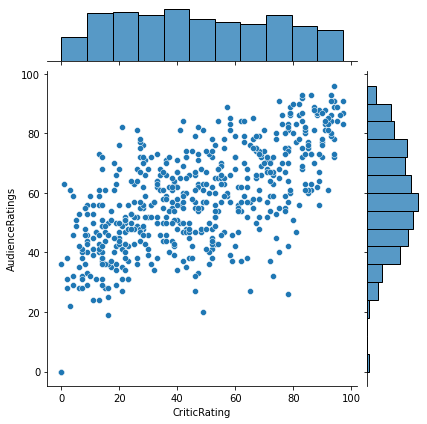

In [13]:
j = sns.jointplot(data=movies, x = 'CriticRating' , y='AudienceRatings')

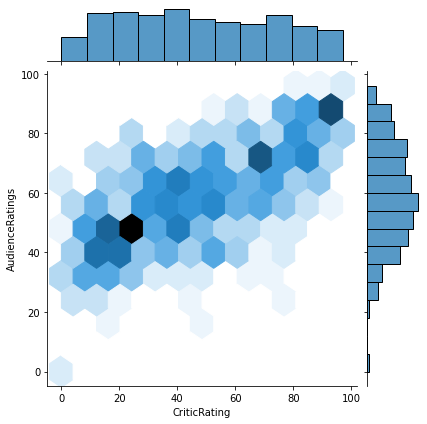

In [14]:
j = sns.jointplot(data=movies, x = 'CriticRating' , y='AudienceRatings',kind='hex')

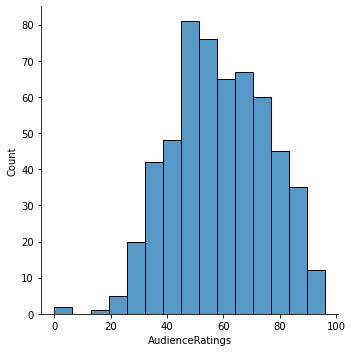

In [15]:
m1 = sns.displot(movies.AudienceRatings, bins=15)

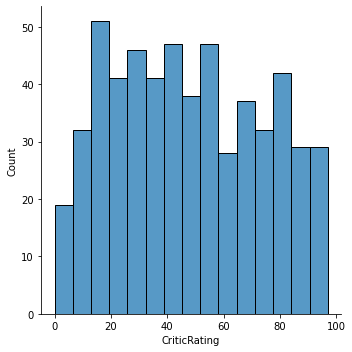

In [16]:
m2 = sns.displot(movies.CriticRating, bins=15)

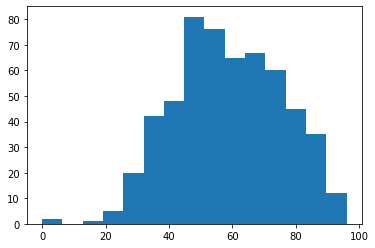

In [17]:
n1 = plt.hist(movies.AudienceRatings, bins=15)

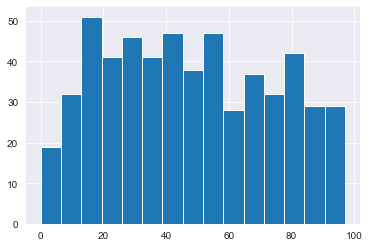

In [18]:
sns.set_style('darkgrid')
n2 = plt.hist(movies.CriticRating, bins=15)

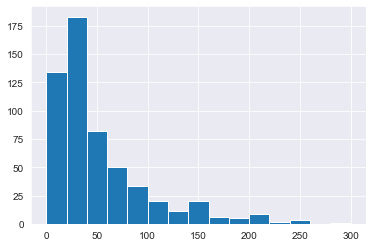

In [19]:
n3 = plt.hist(movies.BudgetMillions, bins=15)

In [20]:
movies[movies.Genre == 'Drama'].BudgetMillions

10     30
11     20
13      7
18      8
23     20
       ..
529    66
532    38
534    21
541    15
545     2
Name: BudgetMillions, Length: 101, dtype: int64

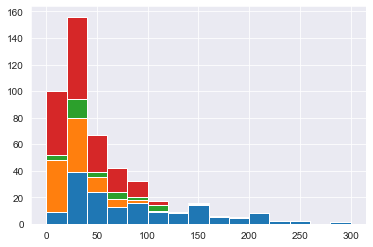

In [27]:
n3 = plt.hist([movies[movies.Genre == 'Action'].BudgetMillions,\
              movies[movies.Genre == 'Drama'].BudgetMillions,\
              movies[movies.Genre == 'Thriller'].BudgetMillions,\
              movies[movies.Genre == 'Comedy'].BudgetMillions],\
              bins=15,stacked=True)

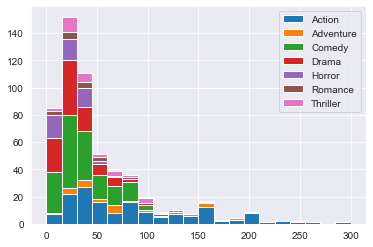

In [41]:
list1 = list()
mylabels = list()
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == gen].BudgetMillions)
    mylabels.append(gen)
h = plt.hist(list1,bins=20,stacked=True, rwidth=1, label=mylabels)
plt.legend()

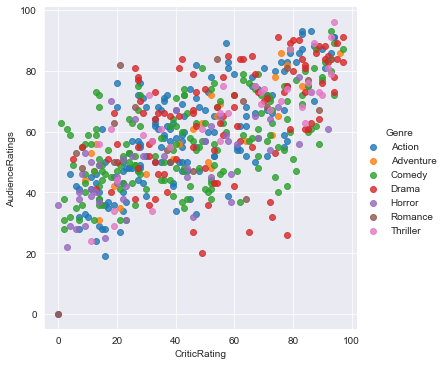

In [44]:
vis1=sns.lmplot(data=movies,x='CriticRating',y='AudienceRatings',\
                fit_reg=False,hue='Genre')

C:\Users\aabas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\aabas\anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\aabas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


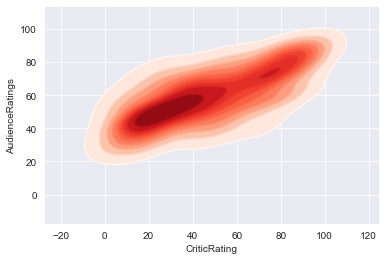

In [48]:
k1 = sns.kdeplot(movies.CriticRating,movies.AudienceRatings,shade=True,\
                 shade_lowest=False,cmap='Reds')
k1b = sns.kdeplot(movies.CriticRating,movies.AudienceRatings,cmap='Reds')

C:\Users\aabas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\aabas\anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


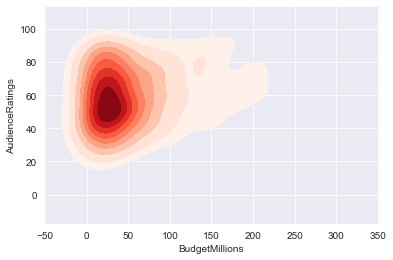

In [49]:
k1 = sns.kdeplot(movies.BudgetMillions,movies.AudienceRatings,shade=True,\
                 shade_lowest=False,cmap='Reds')

C:\Users\aabas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\aabas\anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


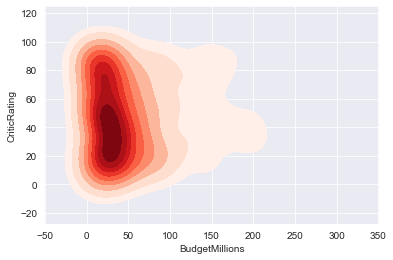

In [50]:
k1 = sns.kdeplot(movies.BudgetMillions,movies.CriticRating,shade=True,\
                 shade_lowest=False,cmap='Reds')

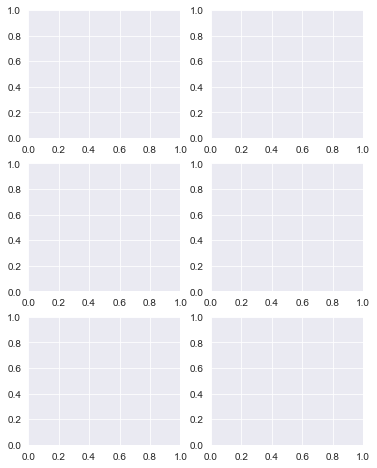

In [55]:
f, ax=plt.subplots(3,2,figsize=(6,8))

C:\Users\aabas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\aabas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


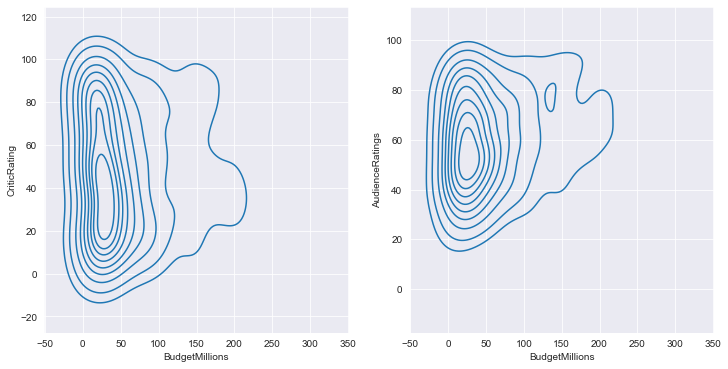

In [57]:
f, axes=plt.subplots(1,2,figsize=(12,6))
k1 = sns.kdeplot(movies.BudgetMillions,movies.CriticRating,ax=axes[0])
k2 = sns.kdeplot(movies.BudgetMillions,movies.AudienceRatings,ax=axes[1])

In [58]:
axes

array([<AxesSubplot:xlabel='BudgetMillions', ylabel='CriticRating'>,
       <AxesSubplot:xlabel='BudgetMillions', ylabel='AudienceRatings'>],
      dtype=object)

C:\Users\aabas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\aabas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[(-20.0, 160.0)]

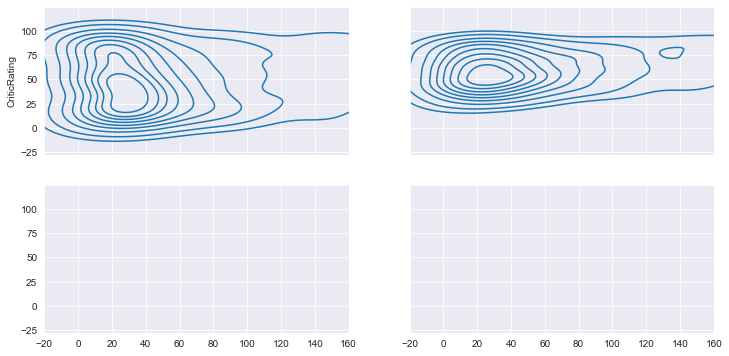

In [62]:
f, axes=plt.subplots(2,2,figsize=(12,6),sharex=True,sharey=True)
k1 = sns.kdeplot(movies.BudgetMillions,movies.CriticRating,ax=axes[0,0])
k2 = sns.kdeplot(movies.BudgetMillions,movies.AudienceRatings,ax=axes[0,1])
k1.set(xlim=(-20,160))

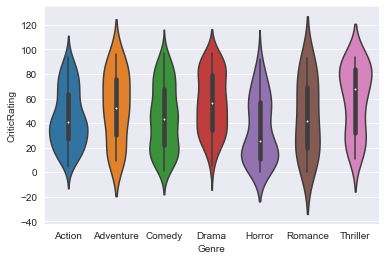

In [66]:
z = sns.violinplot(data=movies,x='Genre',y='CriticRating')

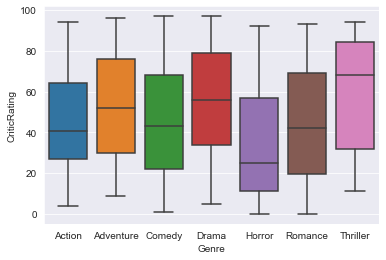

In [67]:
x = sns.boxplot(data=movies,x='Genre',y='CriticRating')

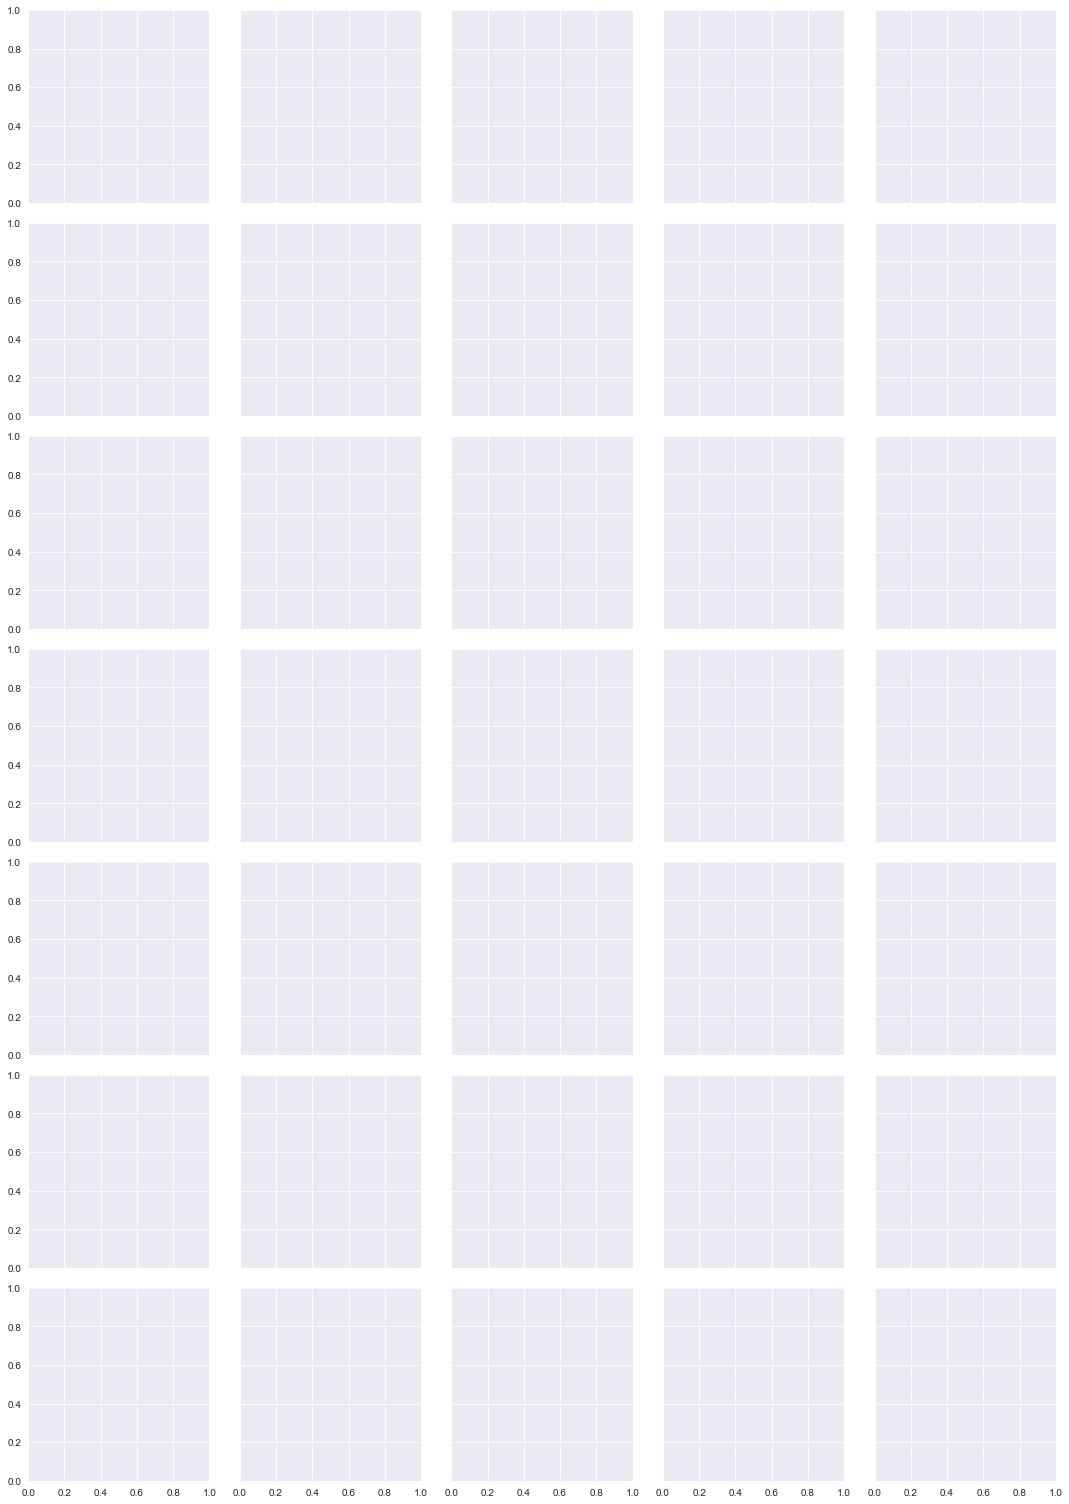

In [69]:
g = sns.FacetGrid(movies, row='Genre', col='Year',hue='Genre')
#vis1=sns.lmplot(data=movies,x='CriticRating',y='AudienceRatings',\fit_reg=False,hue='Genre')

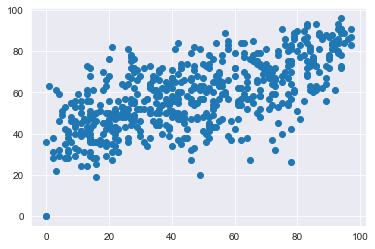

In [70]:
#g = g.map()
plt.scatter(movies.CriticRating,movies.AudienceRatings)

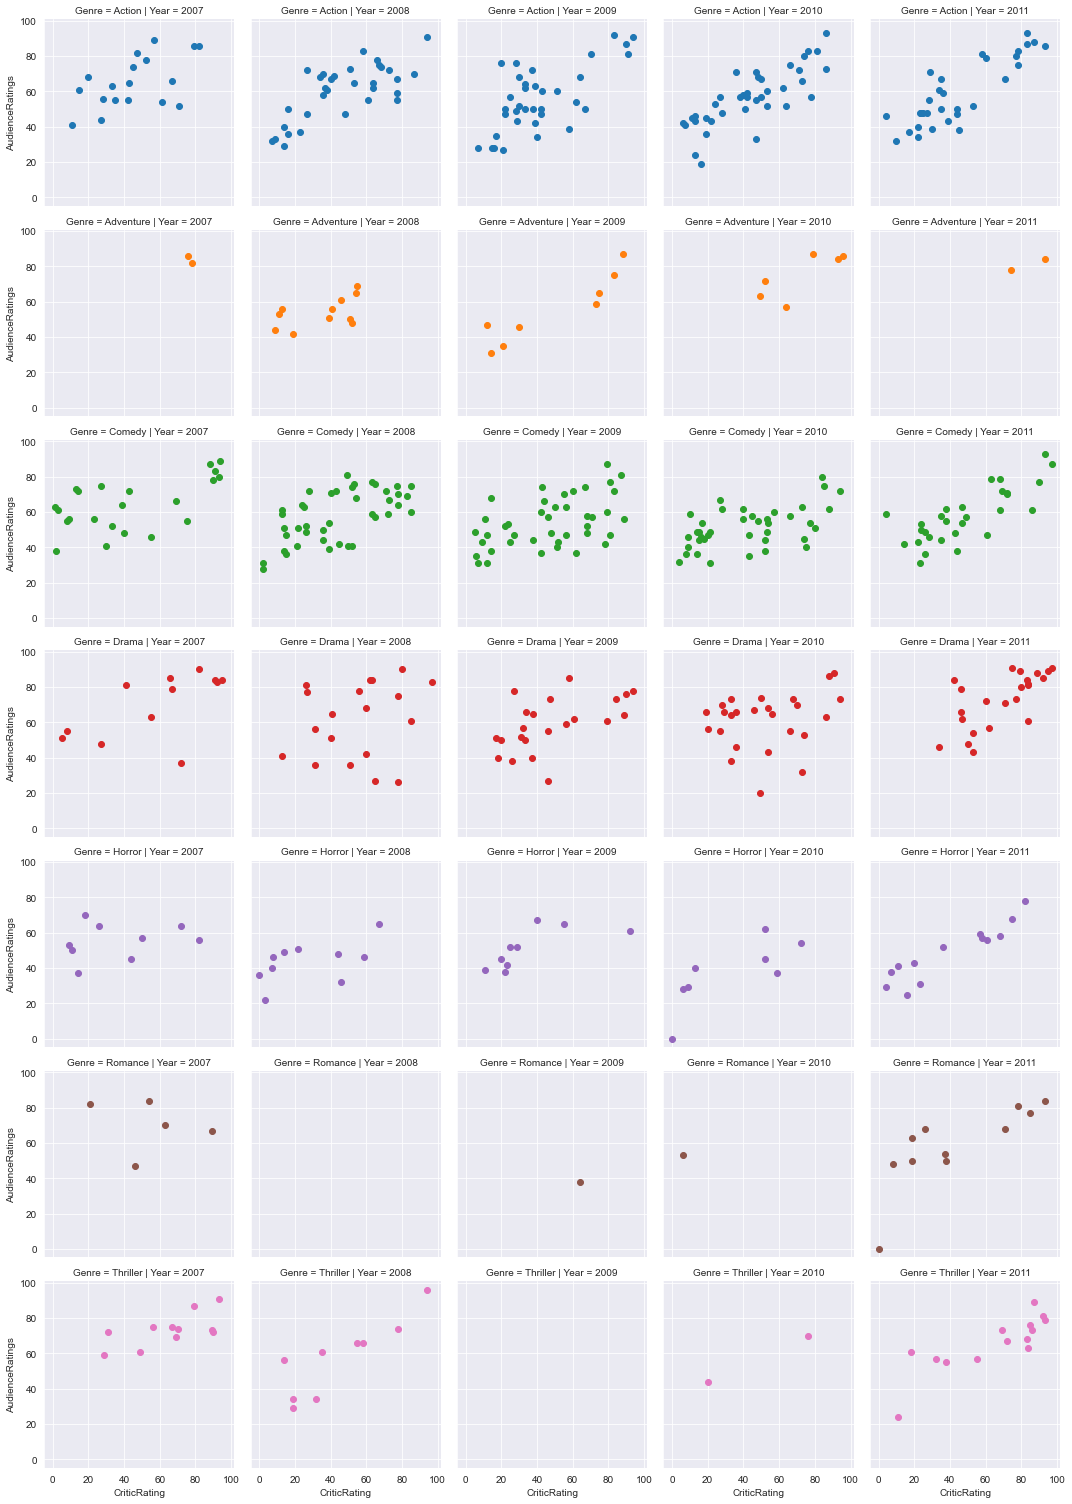

In [72]:
g = sns.FacetGrid(movies, row='Genre', col='Year',hue='Genre')
g = g.map(plt.scatter,'CriticRating','AudienceRatings')

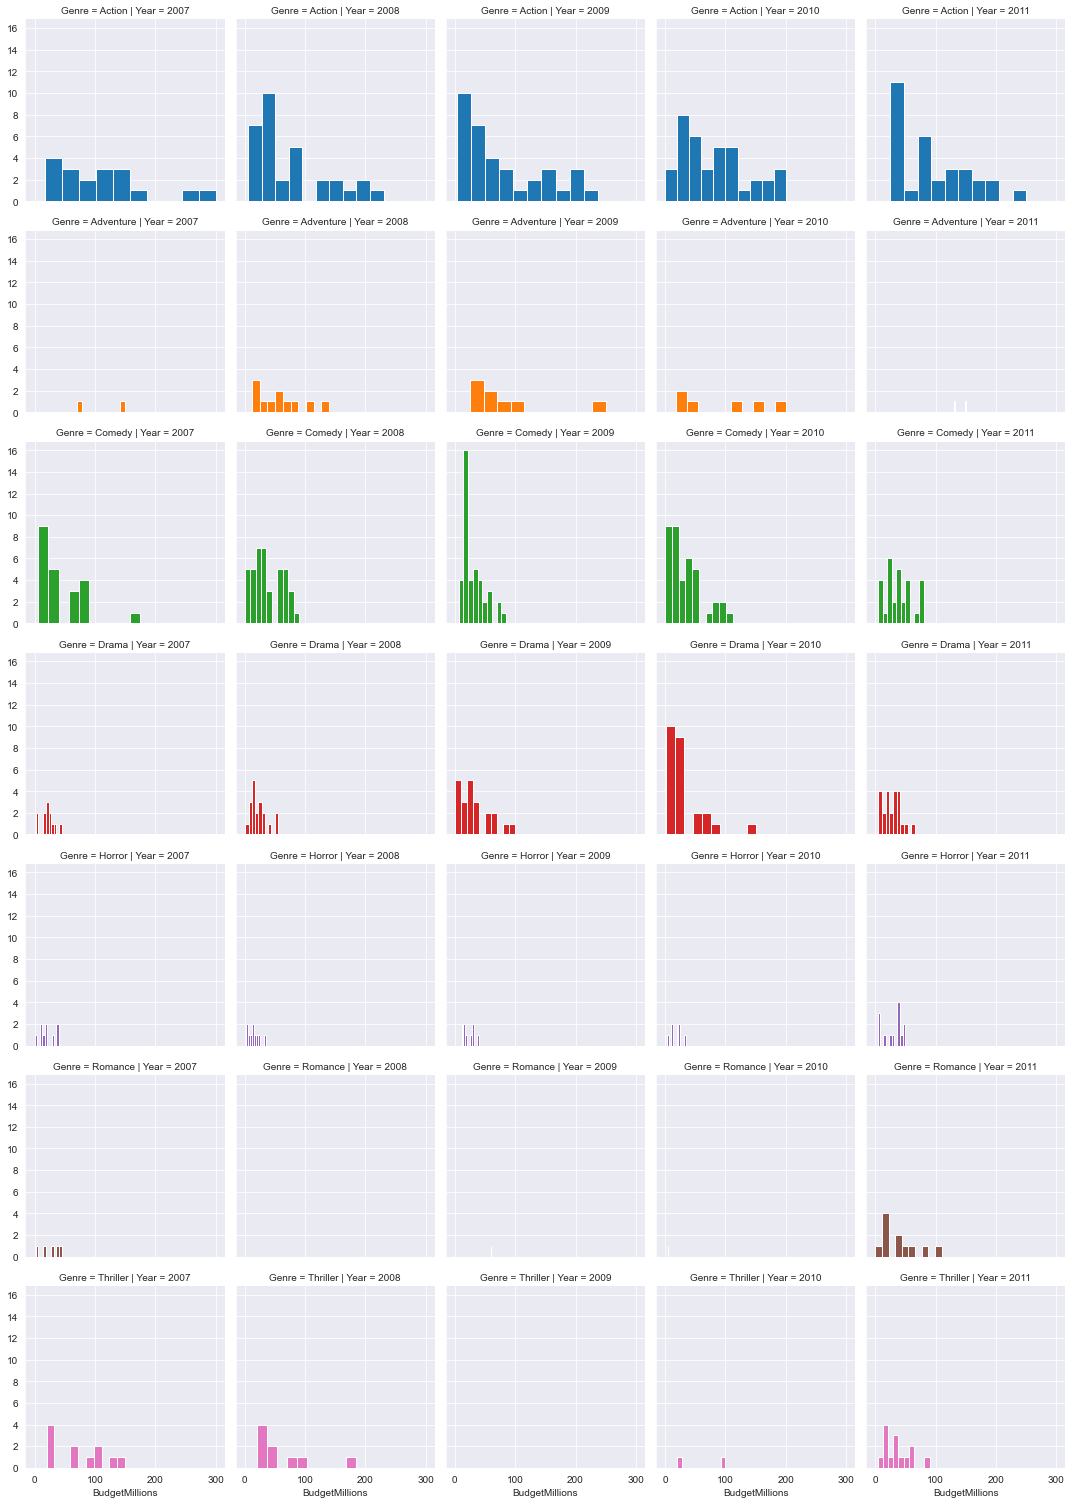

In [75]:
g = sns.FacetGrid(movies, row='Genre', col='Year',hue='Genre')
g = g.map(plt.hist,'BudgetMillions')

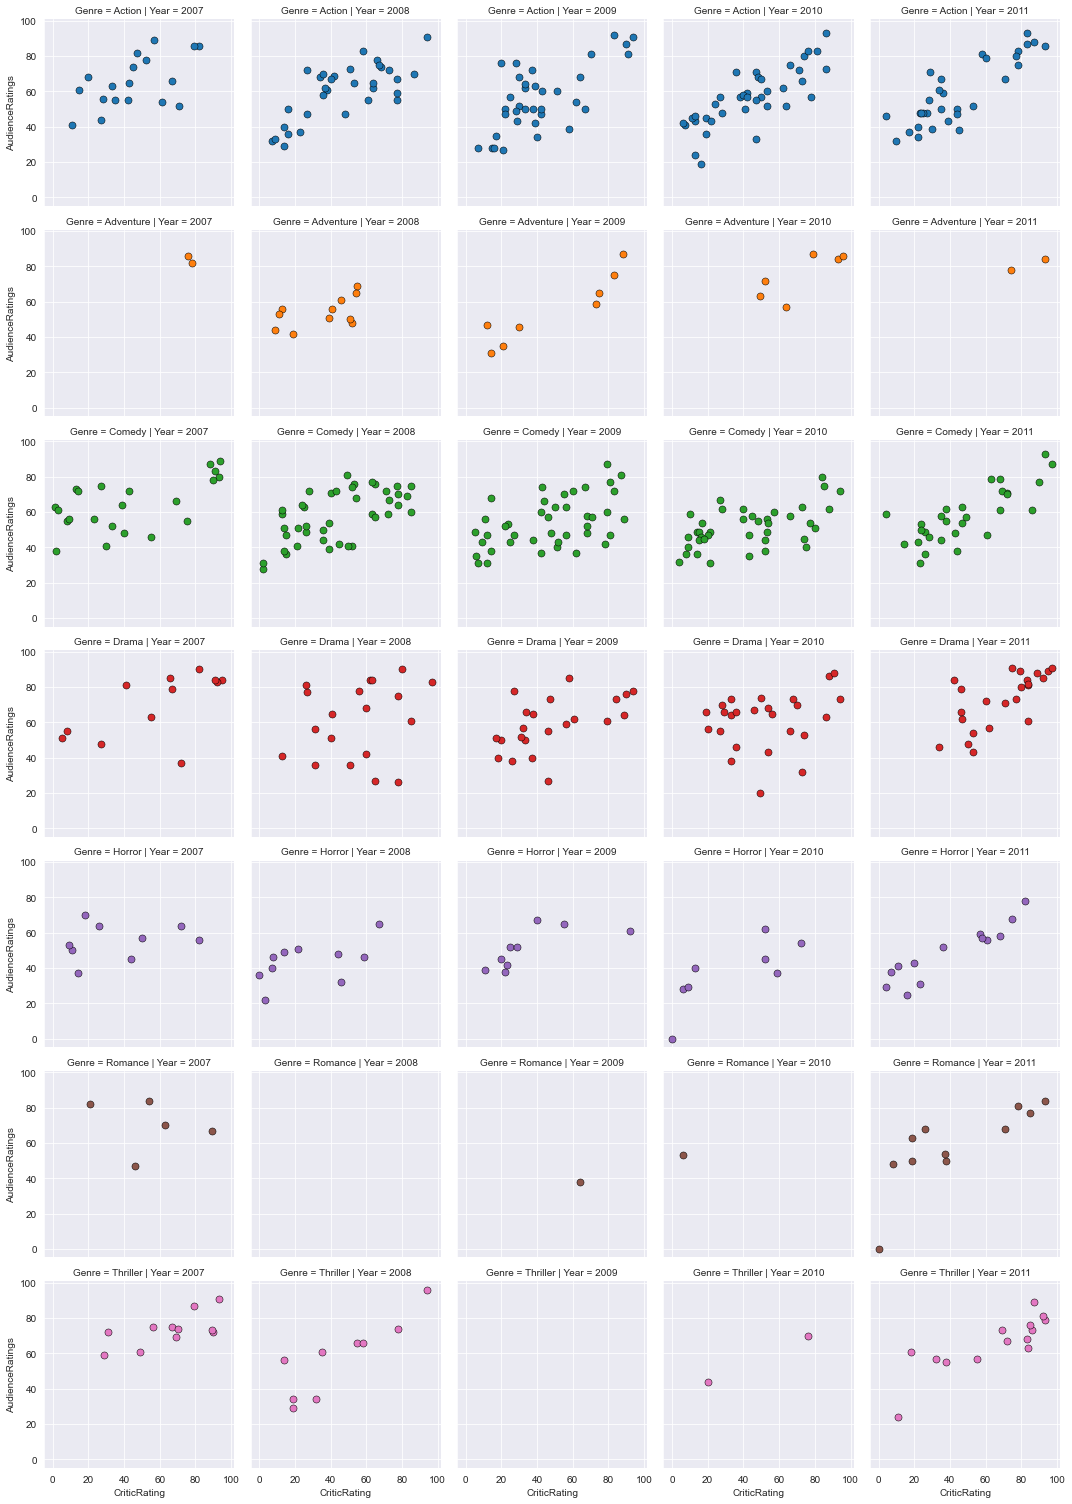

In [77]:
g = sns.FacetGrid(movies, row='Genre', col='Year',hue='Genre')
kws=dict(s=50,linewidth=0.5,edgecolor='black')
g = g.map(plt.scatter,'CriticRating','AudienceRatings',**kws)

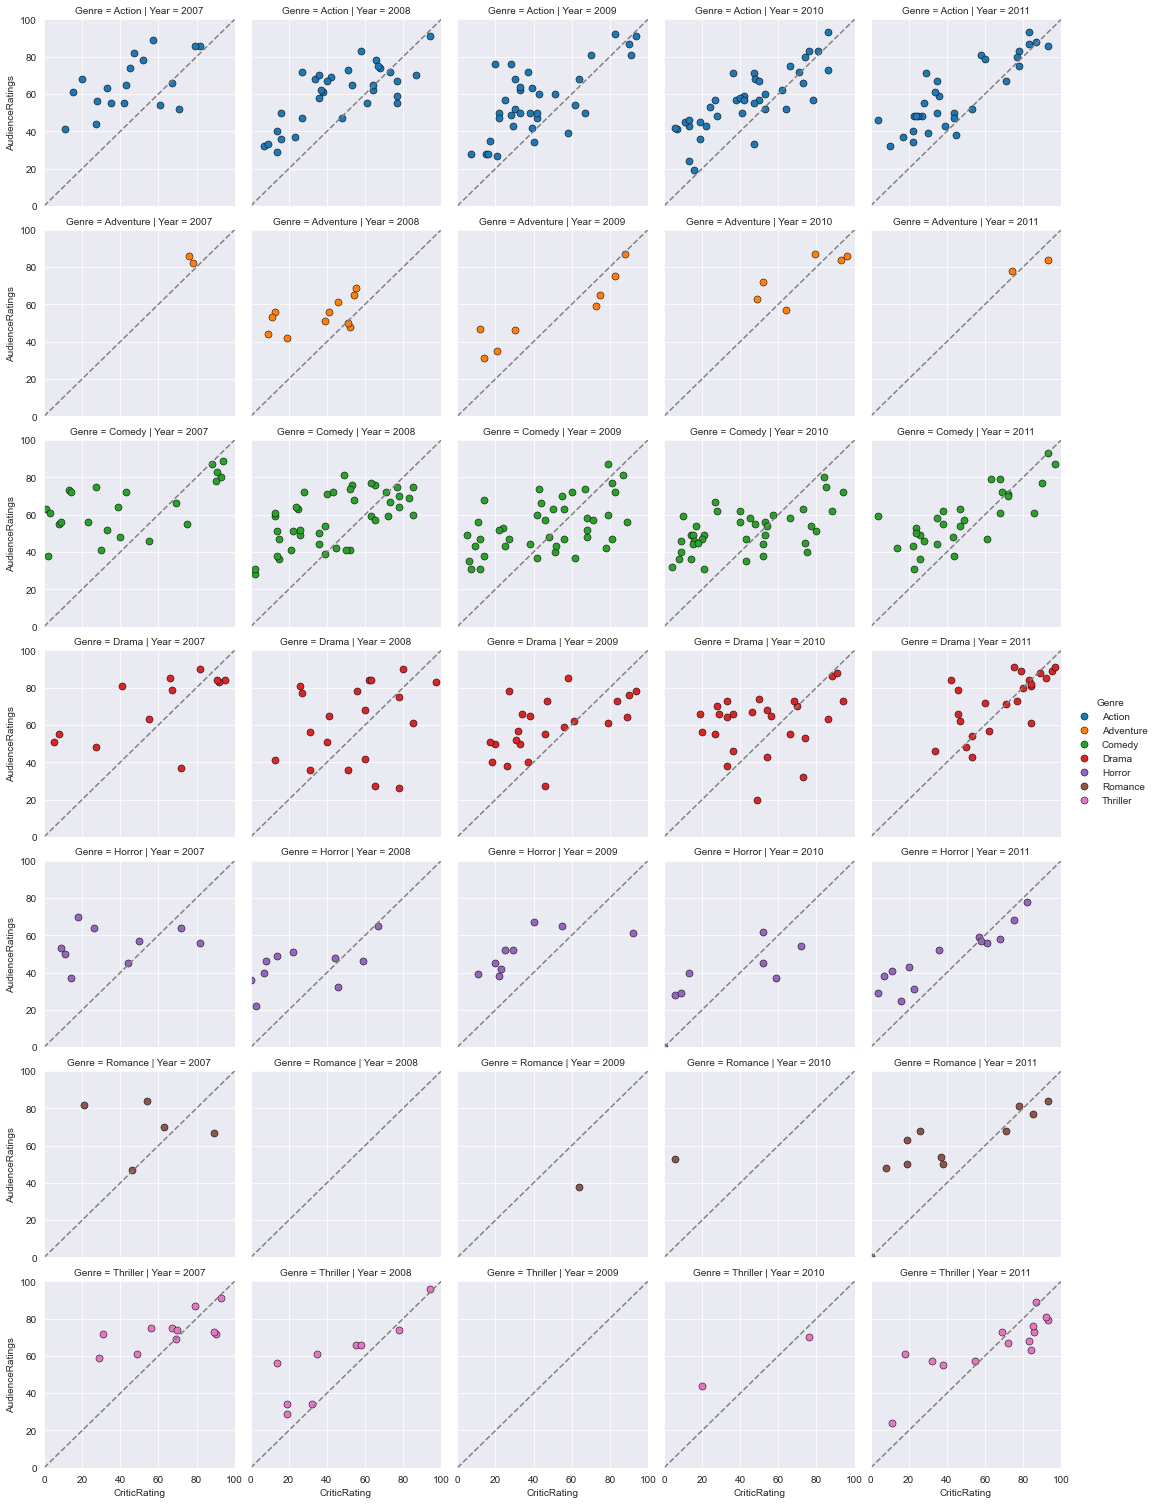

In [82]:
g = sns.FacetGrid(movies, row='Genre', col='Year',hue='Genre')
kws=dict(s=50,linewidth=0.5,edgecolor='black')
g = g.map(plt.scatter,'CriticRating','AudienceRatings',**kws)
g.set(xlim=(0,100),ylim=(0,100))
for ax in g.axes.flat:
    ax.plot((0,100),(0,100),c='gray',ls='--')
g.add_legend()

C:\Users\aabas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\aabas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\aabas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\aabas\anaconda3\lib\si

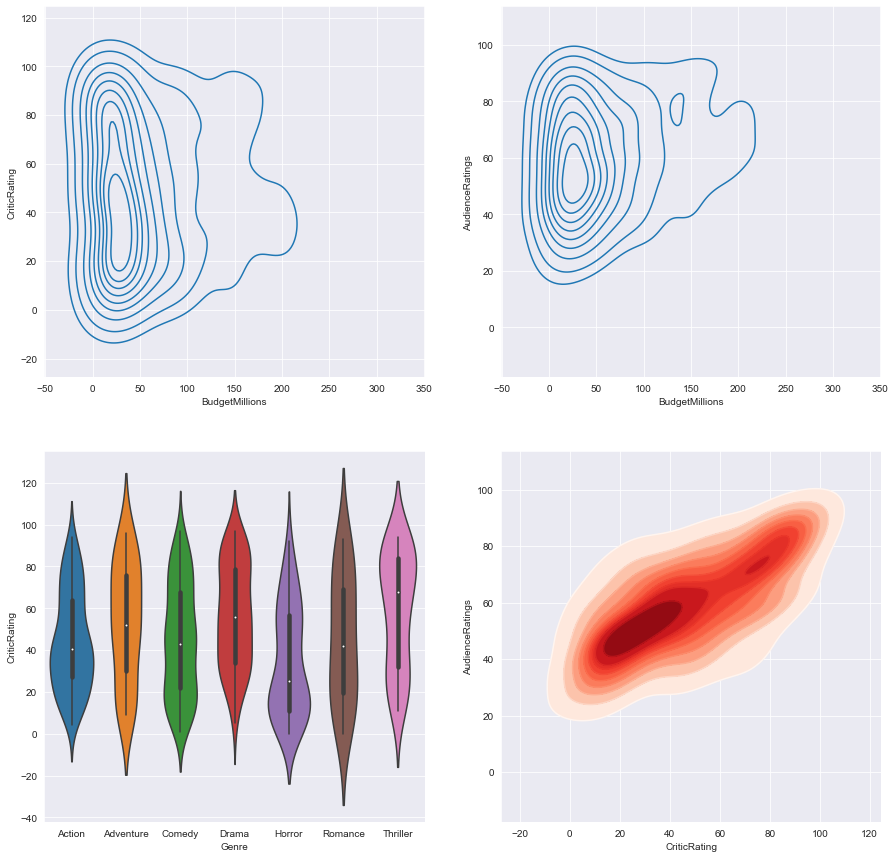

In [90]:
sns.set_style('darkgrid')
f, axes = plt.subplots(2,2,figsize=(15,15))
k1 = sns.kdeplot(movies.BudgetMillions,movies.CriticRating,ax=axes[0,0])
k2 = sns.kdeplot(movies.BudgetMillions,movies.AudienceRatings,ax=axes[0,1])
z = sns.violinplot(data=movies,x='Genre',y='CriticRating',ax=axes[1,0])
k2 = sns.kdeplot(movies.CriticRating,movies.AudienceRatings,shade=True,\
                 shade_lowest=False,cmap='Reds',ax=axes[1,1])
k2b = sns.kdeplot(movies.CriticRating,movies.AudienceRatings,cmap='Reds',ax=axes[1,1])

C:\Users\aabas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\aabas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TypeError: inner() got multiple values for argument 'ax'

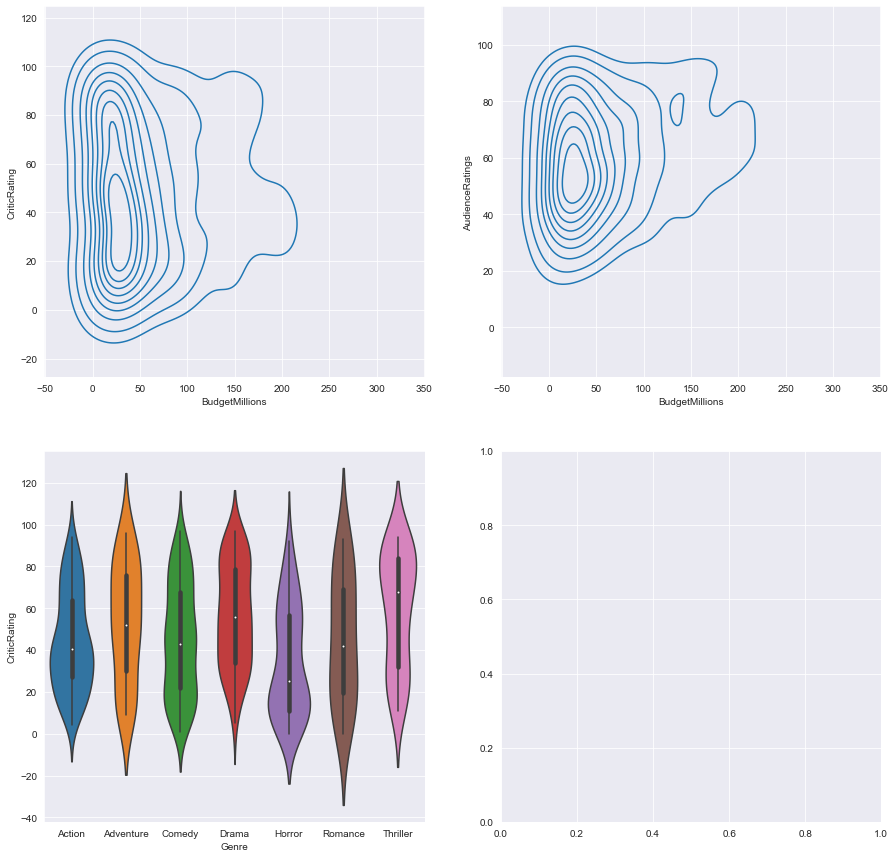

In [91]:
sns.set_style('darkgrid')
f, axes = plt.subplots(2,2,figsize=(15,15))
k1 = sns.kdeplot(movies.BudgetMillions,movies.CriticRating,ax=axes[0,0])
k2 = sns.kdeplot(movies.BudgetMillions,movies.AudienceRatings,ax=axes[0,1])
z = sns.violinplot(data=movies,x='Genre',y='CriticRating',ax=axes[1,0])
n2 = plt.hist(movies.CriticRating, bins=15,ax=axes[1,1])

C:\Users\aabas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\aabas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([19., 32., 51., 41., 46., 41., 47., 38., 47., 28., 37., 32., 42.,
        29., 29.]),
 array([ 0.        ,  6.46666667, 12.93333333, 19.4       , 25.86666667,
        32.33333333, 38.8       , 45.26666667, 51.73333333, 58.2       ,
        64.66666667, 71.13333333, 77.6       , 84.06666667, 90.53333333,
        97.        ]),
 <BarContainer object of 15 artists>)

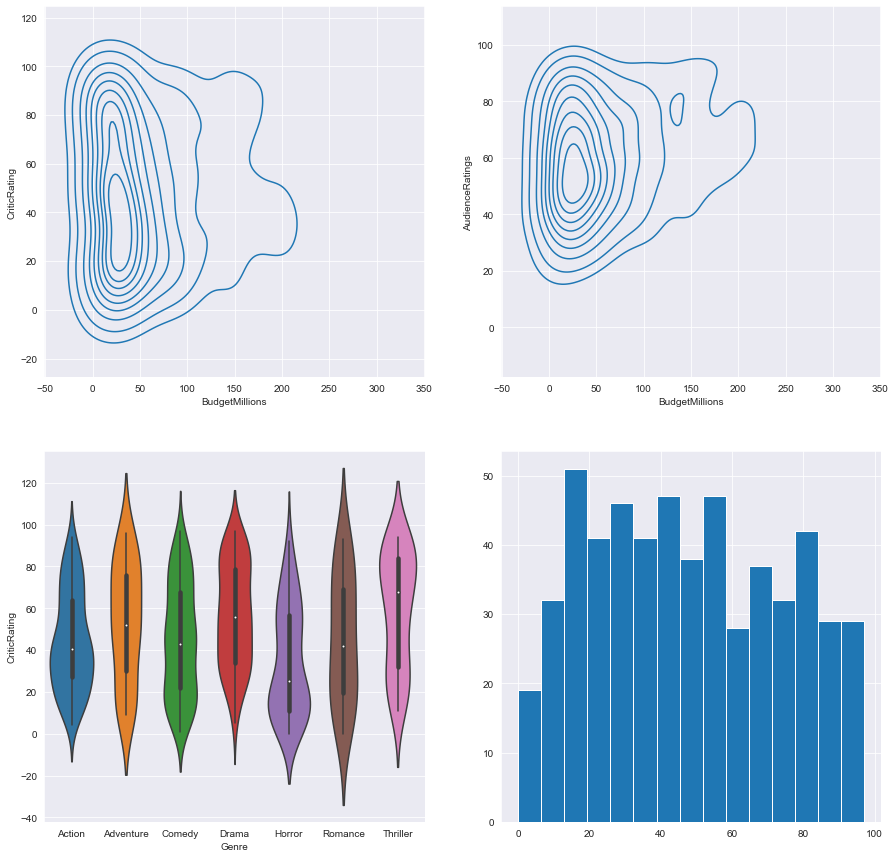

In [92]:
sns.set_style('darkgrid')
f, axes = plt.subplots(2,2,figsize=(15,15))
k1 = sns.kdeplot(movies.BudgetMillions,movies.CriticRating,ax=axes[0,0])
k2 = sns.kdeplot(movies.BudgetMillions,movies.AudienceRatings,ax=axes[0,1])
z = sns.violinplot(data=movies,x='Genre',y='CriticRating',ax=axes[1,0])
axes[1,1].hist(movies.CriticRating, bins=15)

C:\Users\aabas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\aabas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\aabas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\aabas\anaconda3\lib\si

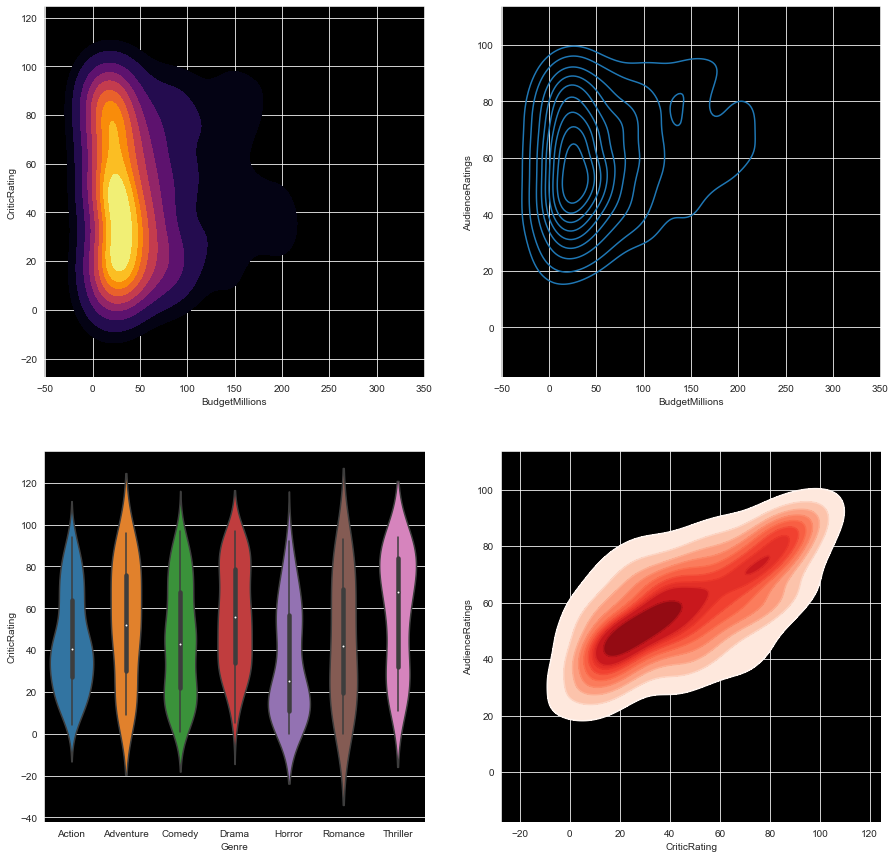

In [100]:
sns.set_style('darkgrid',{"axes.facecolor":"black"})
f, axes = plt.subplots(2,2,figsize=(15,15))
k1 = sns.kdeplot(movies.BudgetMillions,movies.CriticRating,shade=True,\
                 cmap='inferno',ax=axes[0,0])
k2 = sns.kdeplot(movies.BudgetMillions,movies.AudienceRatings,ax=axes[0,1])
z = sns.violinplot(data=movies,x='Genre',y='CriticRating',ax=axes[1,0])
k4 = sns.kdeplot(movies.CriticRating,movies.AudienceRatings,shade=True,\
                 shade_lowest=False,cmap='Reds',ax=axes[1,1])
k4b = sns.kdeplot(movies.CriticRating,movies.AudienceRatings,cmap='Reds',ax=axes[1,1])


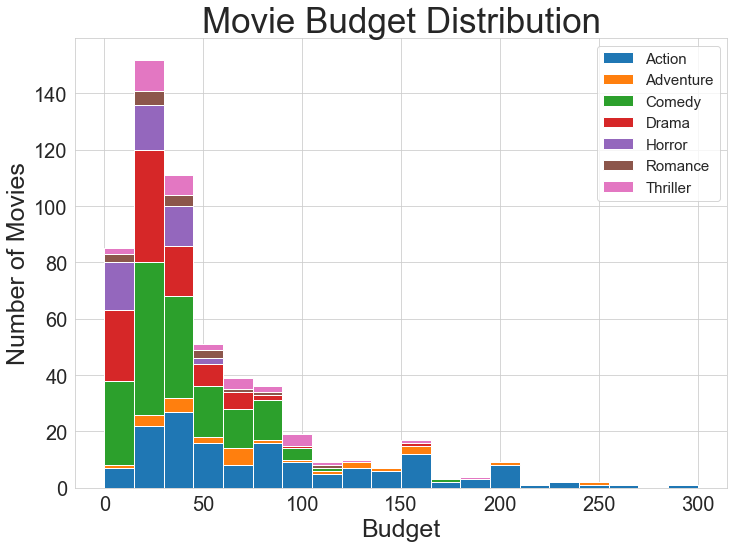

In [112]:
list1 = list()
mylabels = list()
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == gen].BudgetMillions)
    mylabels.append(gen)

sns.set_style("whitegrid")
fig , ax =plt.subplots()
fig.set_size_inches(11.7,8.27)
h = plt.hist(list1,bins=20,stacked=True, rwidth=1, label=mylabels)
plt.title("Movie Budget Distribution",fontsize = 35)
plt.ylabel("Number of Movies",fontsize = 25)
plt.xlabel("Budget",fontsize = 25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(frameon ='True' ,fontsize=15)

In [118]:
mov = pd.read_csv('P4-Section6-Homework-Dataset.csv',encoding='latin1')

In [119]:
mov

,Day of Week,Director,Genre,Movie Title,Release Date,Studio,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Overseas ($mill),Overseas%,Profit ($mill),Profit%,Runtime (min),US ($mill),Gross % US
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,action,The Expendables 3,15/08/2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,Wednesday,William Friedkin,horror,The Exorcist,26/12/1973,WB,"2,363.60",12.0,441.3,6.9,3.39,208.4,47.2,429.3,3577.5,122,232.9,52.8
604,Wednesday,George Lucas,action,Star Wars,25/05/1977,Fox,"3,042.80",11.0,775.4,8.7,4.19,314.4,40.5,764.4,6949.1,121,461.0,59.5
605,Friday,James Cameron,sci-fi,Avatar,18/12/2009,Fox,"3,090.40",237.0,"2,788",7.9,3.78,"2,027.50",72.7,"2,551",1076.4,162,760.5,27.3
606,Wednesday,James Cameron,drama,Titanic,17/12/1997,Paramount Pictures,"3,240.10",200.0,"2,186.80",7.7,3.38,"1,528.10",69.9,"1,986.80",993.4,194,658.7,30.1


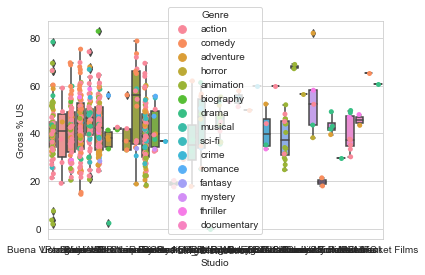

In [124]:
x = sns.boxplot(data=mov,x='Studio',y='Gross % US')
x = sns.stripplot(data=mov,x='Studio',y='Gross % US',hue='Genre')